# 1. Import of libraries 

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.7 MB/s eta 0:00:00


In [5]:
import numpy as np
import urllib.parse
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns 
from google.colab import drive
import sklearn
from  matplotlib.colors import LinearSegmentedColormap
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import median_test
from scipy.stats import f
import statsmodels
import statsmodels.api
from sklearn.cluster import KMeans
drive.mount('drive')

Mounted at drive


# 2. Import data

In [6]:
data=pd.read_csv('/content/drive/MyDrive/projet_2023/Dataset_complete.csv')
data=data.sort_values(by=['target', 'seqnum'])
data.head()
data['ranging_error_abs']=abs(data['ranging_error'])

# 3. Creation of features

##3.1 ranging error : sensors that make more-less errors on average --> wall effect/ ANOVA? test of means

In [ ]:
#(H0) : averages are equal
#(H1) : averages are not equal
mdl = statsmodels.formula.api.ols('ranging_error_abs ~ target', data = data)
res = mdl.fit()
table = statsmodels.api.stats.anova_lm(res)
print('p-valeur anova : ', table.iloc[0,4])

p-valeur anova :  0.21759715692402445


The average ranging error for each target is different.

# 3.2 ranging error : median test

In [ ]:
# 100 classe
data_classe_ranging_error_100=data[data['target']==100]
liste1=list(data_classe_ranging_error_100['ranging_error_abs'])

# 101 classe 
data_classe_ranging_error_101=data[data['target']==101]
liste2=list(data_classe_ranging_error_101['ranging_error_abs'])

# 150 classe 
data_classe_ranging_error_150=data[data['target']==150]
liste3=list(data_classe_ranging_error_150['ranging_error_abs'])

#171 classe 
data_classe_ranging_error_171=data[data['target']==171]
liste4=list(data_classe_ranging_error_171['ranging_error_abs'])


# 180 classe 
data_classe_ranging_error_180=data[data['target']==180]
liste5=list(data_classe_ranging_error_180['ranging_error_abs'])

# 184 classe 
data_classe_ranging_error_184=data[data['target']==184]
liste5=list(data_classe_ranging_error_184['ranging_error_abs'])


print(np.round(median_test(liste1,liste2,liste3,liste4,liste5)[1],2))

0.0


## 3.2 Classify the sensors according to the ranging error

In [ ]:
X = data[['target','ranging_error']]
kmeans = sklearn.cluster.KMeans(n_clusters=3, init='k-means++').fit(X)
kmeans.labels_
np.unique(kmeans.labels_)
data['classe_ranging_error']=kmeans.labels_
data_classe_ranging_error=data[['target','classe_ranging_error']]
data_classe_ranging_error[data_classe_ranging_error['classe_ranging_error']==0]

,target,classe_ranging_error
1826,171,0
1827,171,0
1828,171,0
1829,171,0
1830,171,0
...,...,...
3941,184,0
3942,184,0
3943,184,0
3944,184,0


In [ ]:
np.unique(data['target'])

# 100 classe
data_classe_ranging_error_100=data[data['target']==100]
print(np.mean(data_classe_ranging_error_100['ranging_error']))

# 101 classe 
data_classe_ranging_error_101=data[data['target']==101]
print(np.mean(data_classe_ranging_error_101['ranging_error']))

# 150 classe 
data_classe_ranging_error_150=data[data['target']==150]
print(np.mean(data_classe_ranging_error_150['ranging_error']))

#171 classe 
data_classe_ranging_error_171=data[data['target']==171]
print(np.mean(data_classe_ranging_error_171['ranging_error']))


# 180 classe 
data_classe_ranging_error_180=data[data['target']==180]
print(np.mean(data_classe_ranging_error_180['ranging_error']))

# 184 classe 
data_classe_ranging_error_184=data[data['target']==184]
print(np.mean(data_classe_ranging_error_184['ranging_error']))

0.03948833592534992
0.19163597733711046
0.25137526205450733
-0.06971590909090909
0.030067796610169485
-0.10439971751412429


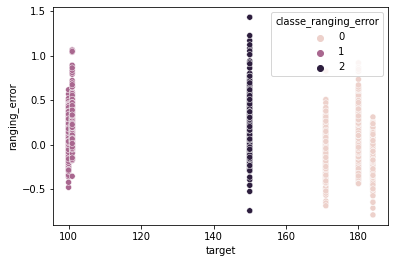

In [ ]:
sns.scatterplot(x=data['target'],y=data['ranging_error'],hue=data['classe_ranging_error'])

# 2. Classify with median

In [ ]:
X = data[['target','ranging_error_abs']]

kmedoids = KMedoids(n_clusters=2, random_state=0, init='k-medoids++').fit(X)
data['classe_ranging_error_mediane']=kmedoids.labels_

In [ ]:
# 100 classe
data_classe_ranging_error_100=data[data['target']==100]
print(np.median(data_classe_ranging_error_100['ranging_error_abs']))

# 101 classe 
data_classe_ranging_error_101=data[data['target']==101]
print(np.median(data_classe_ranging_error_101['ranging_error_abs']))

# 150 classe 
data_classe_ranging_error_150=data[data['target']==150]
print(np.median(data_classe_ranging_error_150['ranging_error_abs']))

#171 classe 
data_classe_ranging_error_171=data[data['target']==171]
print(np.median(data_classe_ranging_error_171['ranging_error_abs']))


# 180 classe 
data_classe_ranging_error_180=data[data['target']==180]
print(np.median(data_classe_ranging_error_180['ranging_error_abs']))

# 184 classe 
data_classe_ranging_error_184=data[data['target']==184]
print(np.median(data_classe_ranging_error_184['ranging_error_abs']))

0.094
0.179
0.244
0.115
0.131
0.122


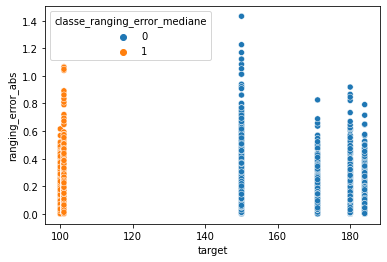

In [ ]:
sns.scatterplot(x=data['target'],y=data['ranging_error_abs'],hue=data['classe_ranging_error_mediane'])

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward',n_clusters=2).fit(X)
data['classe_ranging_error_mediane']=clustering.labels_

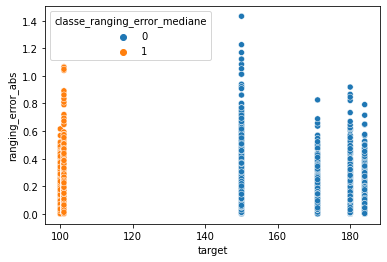

In [ ]:
sns.scatterplot(x=data['target'],y=data['ranging_error_abs'],hue=data['classe_ranging_error_mediane'])

# 3. Egalité des variances

In [ ]:
data.groupby("target")['ranging_error_abs'].agg('var')

target
100    0.010814
101    0.022991
150    0.054111
171    0.015394
180    0.019821
184    0.013984
Name: ranging_error_abs, dtype: float64

In [ ]:
from scipy.stats import bartlett
listes=[liste1,liste2,liste3,liste4,liste5]
i=-1
j=-1
listes_variables=np.unique(data['target'])
for liste1 in listes : 
  i=i+1
  j=0
  for liste2 in listes[1:]:
    j=j+1
    if bartlett(liste1,liste2)[1]<0.05 : 
      print(listes_variables[i], "et ", listes_variables[j], "n'ont pas la meme variance avec", bartlett(liste1,liste2)[1])
    else : 
      print(listes_variables[i], "et ", listes_variables[j], "ont la meme variance avec", bartlett(liste1,liste2)[1])

100 et  101 ont la meme variance avec 1.0
100 et  150 n'ont pas la meme variance avec 2.599664122316929e-59
100 et  171 ont la meme variance avec 0.20238307292254015
100 et  180 ont la meme variance avec 1.0
101 et  101 ont la meme variance avec 1.0
101 et  150 n'ont pas la meme variance avec 2.599664122316929e-59
101 et  171 ont la meme variance avec 0.20238307292254015
101 et  180 ont la meme variance avec 1.0
150 et  101 n'ont pas la meme variance avec 2.599664122316929e-59
150 et  150 ont la meme variance avec 1.0
150 et  171 n'ont pas la meme variance avec 1.8763710046047847e-51
150 et  180 n'ont pas la meme variance avec 2.599664122316929e-59
171 et  101 ont la meme variance avec 0.20238307292254015
171 et  150 n'ont pas la meme variance avec 1.8763710046047847e-51
171 et  171 ont la meme variance avec 1.0
171 et  180 ont la meme variance avec 0.20238307292254015
180 et  101 ont la meme variance avec 1.0
180 et  150 n'ont pas la meme variance avec 2.599664122316929e-59
180 et  17

Tous les couples ont significativement la meme variance sauf les couples avec 150.

In [7]:
np.where(data['target']==150, 1,0)

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
data["feature_ranging_error"]=np.where(data['target']==150, 1,0)
data

,initiator,target,protocol,nlos_indicator,t1,t2,t3,t4,skew,tof,...,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean,register_dump_CIR,ranging_error_abs,feature_ranging_error
0,183,100,TWR,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,...,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667,"{""ACC_MEM"": ""AAT/9gACAAr/+wABAAL/8wAS//AACgAGA...",0.226,0
1,183,100,TWR,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,...,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724,"{""ACC_MEM"": ""//gAEwAC//X/9gAXABEACwASABQAFgAG/...",0.047,0
2,183,100,TWR,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,...,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983,"{""ACC_MEM"": ""//QABQAJ//X/9gAUABMADv/3//r//gAK/...",0.106,0
3,183,100,TWR,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,...,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890,"{""ACC_MEM"": ""ACb//AAa//4ADQAJAAYALf/+ABQAEgAOA...",0.051,0
4,183,100,TWR,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,...,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592,"{""ACC_MEM"": ""//b/+P/6//3/8QAI//H//P/1AAkAAv/3A...",0.056,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,183,184,TWR,3.075243,301428484750,302000434919,302102988430,301531040251,-9.382925,995,...,46.939999,1654930833773,4231,-80.229179,-79.428015,-79.342829,-79.666674,"{""ACC_MEM"": ""ABH//QAT//YABQASAAIAFwAUAAsAAv/3A...",0.076,0
3942,183,184,TWR,3.085177,375355600014,375928251294,376031194254,375458544956,-8.306196,991,...,47.319996,1654930834930,4237,-80.196487,-79.576395,-79.985511,-79.919464,"{""ACC_MEM"": ""ABkADQAOAAgABv/7ABgABAAG//n////w/...",0.347,0
3943,183,184,TWR,2.674524,449294310542,449867663034,449970544782,449397194279,-8.952233,994,...,46.939999,1654930836088,4243,-80.158638,-79.435472,-79.234453,-79.609521,"{""ACC_MEM"": ""AA8AAQAE/////P/zABz/+P////8AAwAAA...",0.175,0
3944,183,184,TWR,2.727551,523279420046,523853474064,523955982478,523381930458,-8.490778,999,...,46.559998,1654930837246,4249,-80.229492,-79.554364,-79.599858,-79.794571,"{""ACC_MEM"": ""ABoACwAEABEACQADAAL//wAPAAYAFP/4A...",0.273,0


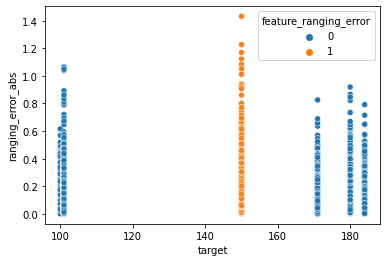

In [10]:
sns.scatterplot(x=data['target'],y=data['ranging_error_abs'],hue=data['feature_ranging_error'])